In [27]:
from matplotlib import font_manager as fm, rcParams

zh_fonts = [f.name for f in fm.fontManager.ttflist if any(ch in f.name for ch in ['Hei','Song','Sim'])]
if zh_fonts:
    rcParams['font.family'] = zh_fonts[0]  # 使用找到的第一个中文字体
else:
    print("系统中未找到中文字体，中文可能无法显示")

In [28]:
import os
from main import sine_model
import numpy as np
import cv2
import matplotlib.pyplot as plt

def visualize_fit(img_path, clusters, params_list, save_path=None):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(10, 6))
    plt.imshow(img, cmap='gray')
    # plt.title(f"裂隙拟合效果: {os.path.basename(img_path)}")
    plt.title(f"裂隙拟合效果")

    for i, (cluster, params) in enumerate(zip(clusters, params_list)):
        x_data = cluster[:, 0]
        y_data = cluster[:, 1]

        # 只有第一条裂隙才加图例label
        label_scatter = "裂隙点" if i == 0 else None
        plt.scatter(x_data, y_data, s=5, c='black', alpha=0.6, label=label_scatter)

        if params is not None:
            R, P, beta, C = params
            x_fit = np.linspace(x_data.min(), x_data.max(), 500)
            y_fit = sine_model(x_fit, R, P, beta, C)
            label_fit = "拟合曲线" if i == 0 else None
            plt.plot(x_fit, y_fit, 'r-', linewidth=2, label=label_fit)

    plt.gca().invert_yaxis()

        # 图例只显示一次
    plt.legend(
        loc="upper left",
        bbox_to_anchor=(1.02, 1),   # 往右挪出图像
        borderaxespad=0,
        frameon=False
    )
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


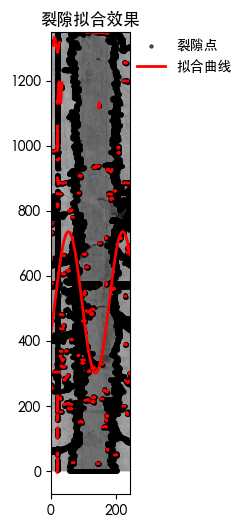

In [29]:
from main import extract_edge_points, cluster_points, fit_sine_to_cluster

img_path = "./images/attach_2_1.jpg"
points = extract_edge_points(img_path)
clusters = cluster_points(points)

params_list = []
for cluster in clusters:
    params = fit_sine_to_cluster(cluster)
    params_list.append(params)

visualize_fit(img_path, clusters, params_list, save_path="fit_result_2_1.png")

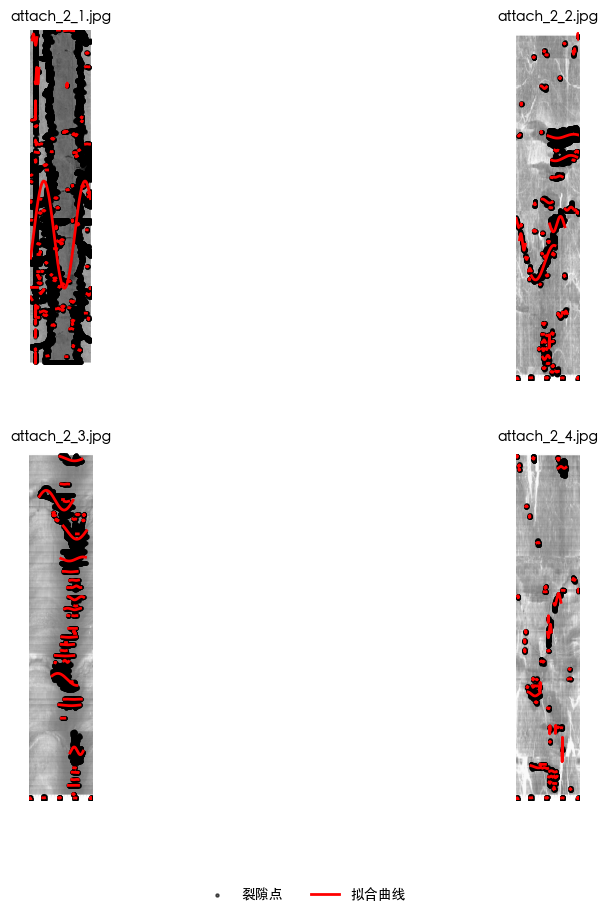

In [31]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from main import sine_model, extract_edge_points, cluster_points, fit_sine_to_cluster

def visualize_fit_subplot(ax, img_path, clusters, params_list, title="裂隙拟合效果"):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    ax.imshow(img, cmap='gray')
    ax.set_title(title, fontsize=10)
    ax.axis("off")

    for i, (cluster, params) in enumerate(zip(clusters, params_list)):
        x_data = cluster[:, 0]
        y_data = cluster[:, 1]

        label_scatter = "裂隙点" if i == 0 else None
        ax.scatter(x_data, y_data, s=5, c='black', alpha=0.6, label=label_scatter)

        if params is not None:
            R, P, beta, C = params
            x_fit = np.linspace(x_data.min(), x_data.max(), 500)
            y_fit = sine_model(x_fit, R, P, beta, C)
            label_fit = "拟合曲线" if i == 0 else None
            ax.plot(x_fit, y_fit, 'r-', linewidth=2, label=label_fit)

    ax.invert_yaxis()

# 主逻辑：四图排成 2x2
img_paths = [
    "./images/attach_2_1.jpg",
    "./images/attach_2_2.jpg",
    "./images/attach_2_3.jpg",
    "./images/attach_2_4.jpg"
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(wspace=0.1, hspace=0.2)  # 控制子图间距

for ax, img_path in zip(axes.flat, img_paths):
    points = extract_edge_points(img_path)
    clusters = cluster_points(points)
    params_list = [fit_sine_to_cluster(c) for c in clusters]
    visualize_fit_subplot(ax, img_path, clusters, params_list, title=os.path.basename(img_path))

# 图例统一放到下方
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=2, frameon=False)

plt.savefig("fit_results_grid.png", dpi=300, bbox_inches="tight")
plt.show()
